In [223]:
using NBInclude
@nbinclude("functions.ipynb")
function load_model_identity(load_dir::String, epoch::Int)
    print("Loading model...")
    @load joinpath(load_dir, "model-$epoch.bson") encoder_μ encoder_logvar decoder decoder_last
    println("Done")
    return encoder_μ, encoder_logvar, decoder, decoder_last
    
end

function load_model_sep(load_dir::String, epoch::Int)
    print("Loading model...")
    @load joinpath(load_dir, "model-$epoch.bson") encoder_μ encoder_logvar W1 W2 W3 Q
    println("Done")
    return encoder_μ, encoder_logvar, W1, W2, W3, Q
end

function load_model(load_dir::String, epoch::Int)
    print("Loading model...")
    @load joinpath(load_dir, "model-$epoch.bson") encoder_μ encoder_logvar decoder
    println("Done")
    return encoder_μ, encoder_logvar, decoder
end
function get_train_loader(batch_size, shuffle::Bool)
    # The MNIST training set is made up of 60k 28 by 28 greyscale images
    train_x, train_y = MNIST.traindata(Float32)
    train_x = 1 .- reshape(train_x, (784, :))
    return DataLoader((train_x, train_y), batchsize=batch_size, shuffle=shuffle, partial=false)
end

function get_test_loader(batch_size, shuffle::Bool)
    # The FashionMNIST test set is made up of 10k 28 by 28 greyscale images
    test_x, test_y = MNIST.testdata(Float32)
    test_x = 1 .- reshape(test_x, (784, :))
    return DataLoader((test_x, test_y), batchsize=batch_size, shuffle=shuffle)
end

#using MosaicViews
#using ImageShow
using Colors: color_names


All function imported


In [224]:

z_inco_list = load("saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_inco_list")
z_co_list = load("saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_co_list")

x_true_list = load("saved_data/MNIST_image_recovery_20_sigmoid.jld", "x_true_list")
z_est_inco_matrix = load("saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_est_inco_matrix")
z_est_co_matrix = load("saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_est_co_matrix")
epoch = load("saved_data/MNIST_image_recovery_20_sigmoid.jld", "epoch")
m_list = load("saved_data/MNIST_image_recovery_20_sigmoid.jld", "m_list")


z_co_sig_list = load("saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_co_sig_list")
z_est_co_sig_matrix = load("saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_est_co_sig_matrix")


epoch_to_load_inco = 25
dir_inco = "trained_GNN/MNIST_identity_v4"
encoder_μ_inco, encoder_logvar_inco, W1_inco, W2_inco, W3_inco, Q_inco = load_model_sep(dir_inco, epoch_to_load_inco);

# Load the model and test set loader unenforced
epoch_to_load_co = 25
dir_co = "trained_GNN/MNIST_v2"
encoder_μ_co, encoder_logvar_co, W1_co, W2_co, W3_co, Q_co = load_model_sep(dir_co, epoch_to_load_co);

# Load the model and test set loader unenforced
epoch_to_load_co = 20
dir_co = "trained_GNN/MNIST"
encoder_μ_co_sig, encoder_logvar_co_sig, decoder = load_model(dir_co, epoch_to_load_co);

#setup
x_dim = 784
k = 20
tolerance = 1e-7; max_iter = 5000; out_toggle = 0


# G_inco(z) = decoder_last * decoder(z)
G_inco(z) =Q_inco *W3_inco*relu(W2_inco*relu(W1_inco*z))
G_co(z) = Q_co*relu(W2_co*relu(W1_co*z));
G_co_sig(z) = sigmoid(Flux.params(decoder)[3]*relu(Flux.params(decoder)[2]*relu(Flux.params(decoder)[1]*z)))



Loading model...Done
Loading model...Done
Loading model...Done

G_co_sig (generic function with 1 method)

In [225]:
num = 4
z_inco = z_inco_list[num, :]
z_co = z_co_list[num, :]
z_co_sig = z_co_sig_list[num, :]

x_true = x_true_list[num, :]
z_est_inco_list = z_est_inco_matrix[num,:,:]
z_est_co_list = z_est_co_matrix[num,:,:]
z_est_co_sig_list = z_est_co_sig_matrix[num,:,:]

20×13 Matrix{Float64}:
 -1.45598     5.75042   -1.67483   …   0.806403    1.86445     1.86526
 -5.22241   -24.1791    15.5511        2.17793    -0.362802   -0.391242
  3.62767    11.37       5.47996      -9.55355     1.06667     1.05137
 -1.96374     9.7025     7.13768       0.0739016   0.878907    0.879483
 -1.11667    -7.04018    8.02305       3.15831    -0.160224   -0.118838
 -1.1883      4.62213    3.975     …  -0.992359    0.840813    0.842553
 -2.58503    -7.95627    1.74375       1.07421     0.303539    0.302884
  6.7891    -16.2084     3.34902       0.502902   -0.462987   -0.424027
 -0.384284  -11.3275     7.33864      -1.04658    -0.405712   -0.403828
  1.34602    -4.41654   -1.39086       1.05318     0.791531    0.793218
  4.94292     7.54906    0.806228  …   1.06886     0.340334    0.340347
 -0.832723   -2.5424     4.56807       0.599669   -0.934396   -0.934677
  7.09903    -1.60497   15.6328        5.72601     1.1822      1.11984
  2.82651   -44.0927   -31.0297        7.708

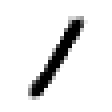

In [404]:
k = 1
num = 1
i = 1
colorview(Gray, reshape(G_inco(z_inco_list[num, : , i]), 28, 28)')

In [405]:
m_list

13-element Vector{Int64}:
  10
  15
  20
  25
  30
  35
  40
  45
  50
 100
 150
 200
 250

In [415]:
using Plots.PlotMeasures
using Plots
using LaTeXStrings
num = 4
epoch = 40
z_inco = z_inco_list[num, :]
z_co = z_co_list[num, :]
x_true = x_true_list[num, :]
z_est_inco_list = z_est_inco_matrix[num,:,:]
z_est_co_list = z_est_co_matrix[num,:,:]
k = 10
nums = [1,4,5]
meas = [0, 1, 2,3 ,4,9,10,12,13]
recovery_arrays = [z_est_inco_matrix,  z_est_co_matrix, z_est_co_sig_matrix]
G_arrays = [G_inco, G_co , G_co_sig]
signal_arrays = [z_inco_list, z_co_list, z_co_sig_list]

#k_arrays = [(G_inco, z_est_inco_matrix), (G_co, z_est_co_matrix)]
#num = 1
plots = Array{Plots.Plot, 3}(undef,length(nums),length(meas),length(recovery_arrays))

kwargs = Dict()

for (i,m) in enumerate(meas), (j,num) in enumerate(nums), (k, (G_fn, img_array)) in enumerate(zip(G_arrays, recovery_arrays))

       kwargs = Dict()
       kwargs[:axis] =([], false)
       kwargs[:dpi] = 300
       kwargs[:left_margin] = -3mm
       kwargs[:right_margin] = 0mm
       kwargs[:bottom_margin] = -3mm
       #kwargs[:showaxis] = false
       #kwargs[:framestyle] = :none
       
       
       #kwargs[:title] = "test"
       #number of measurements
       if j == 1 && k == 1
              if i==1
                     kwargs[:title] = "signal" 
                     kwargs[:titlefontsize] = 13
              else
                     # if i == 2
                     #        kwargs[:title] = L"m = %$(m_list[m])"
                     #        kwargs[:titlefontsize] = 10
                     # else
                     kwargs[:title] = "$(m_list[m])" 
                     kwargs[:titlefontsize] = 13
                     # end
              end
       end

       if j == length(nums) && k == length(recovery_arrays)
              kwargs[:bottom_margin] = 1mm
       end

       #coherence label
       if i == 1
              kwargs[:left_margin] = 3mm
              if k == 1
                     # if j == 1
                     #        kwargs[:guidefontsize] = 9
                     #        kwargs[:ylabel] = L"\alpha=0.81"
                     # else
                     kwargs[:guidefontsize] = 13
                     kwargs[:ylabel] = "0.82"
                     # end
              elseif k == 2
                     # if j==1
                     #        kwargs[:guidefontsize] = 8
                     #        kwargs[:ylabel] = L"\alpha = 0.96"
                     # else
                     kwargs[:guidefontsize] = 13
                     kwargs[:ylabel] = "0.96"
              else
                     kwargs[:guidefontsize] = 13
                     kwargs[:ylabel] = "Sig"
              end
       end

       #margin
       if k == 1 && j > 1
              kwargs[:top_margin] = 7mm
       else
              kwargs[:top_margin] = 0mm
       end
       

       #margin at the top
       if k == 1 && j ==1
              kwargs[:top_margin] = 0mm
       end

       #plot
       if i == 1
              plots[j, i, k] = plot(colorview(Gray, reshape(G_arrays[k](signal_arrays[k][num, :]), 28, 28)'); kwargs...)
       else
              plots[j,i,k] = plot(colorview(Gray, reshape(G_fn(img_array[num, : , m]), 28, 28)'); kwargs...)
       end

       # if j == 1
       #        if i == 1
       #               plots[j, i, 1] = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m]), 28,28)' ),axis=([], false), ylabel="α = 0.81",guidefontsize=5, titlefontsize=12,title = L"m = %$(m_list[m])", topmargin=2mm)
       #        else
       #               plots[j, i, 1] = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m]), 28,28)' ),axis=([], false), titlefontsize=12,title = L"m = %$(m_list[m])", topmargin=2mm)
       #        end
       # else
       #        if i == 1
       #               plots[j, i, 1] = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m]), 28,28)' ),axis=([], false), ylabel = "α = 0.96", guidefontsize=5, topmargin=2mm)
              
       #        else

       #               plots[j, i, 1] = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m]), 28,28)' ),axis=([], false), topmargin=2mm)
       #        end
       # end
       # plots[j, i, 2] = plot(colorview(Gray, reshape(G_co(z_est_co_matrix[num,:, m]), 28,28)' ), axis=([], false))
       #, title = L"m = %$(m_list[m])",
end
plots = reshape(plots, length(nums), length(meas)*length(recovery_arrays))

# num = 1
# m = 2

# plot(
#                 plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m]), 28,28)' ),framestyle = :none, titlefontsize	=14,title = L"m = %$(m_list[m])", topmargin=10mm ),
#                 plot(colorview(Gray, reshape(G_co(z_est_co_matrix[num,:, m]), 28,28)' ),framestyle = :none),
#                 layout = @layout([a ; b])
#                 )
#plot(plots...)
# nums = [1,4,5]
# meas = [ 1, 2, 3, 4, 9, 10, 12 ,13]
# for index in 1:length(meas)
#     m = meas[index]
#     push!(p, plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m]), 28,28)' ),framestyle = :none, titlefontsize	=14,title = L"m = %$(m_list[m])", topmargin=10mm )) #, title = L"m = %$(m_list[m])",
#     push!(q, plot(colorview(Gray, reshape(G_co(z_est_co_matrix[num,:, m]), 28,28)' ),framestyle = :none))
# end
#plot1 = plot(p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8], p[9],
#    q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8], q[9],
#       layout = (2,9), size = (1200,250))


       #savefig(plot1, "figures/Image_recov_1.pdf")


       

3×27 Matrix{Plots.Plot}:
 Plot{Plots.GRBackend() n=1}  …  Plot{Plots.GRBackend() n=1}
 Plot{Plots.GRBackend() n=1}     Plot{Plots.GRBackend() n=1}
 Plot{Plots.GRBackend() n=1}     Plot{Plots.GRBackend() n=1}

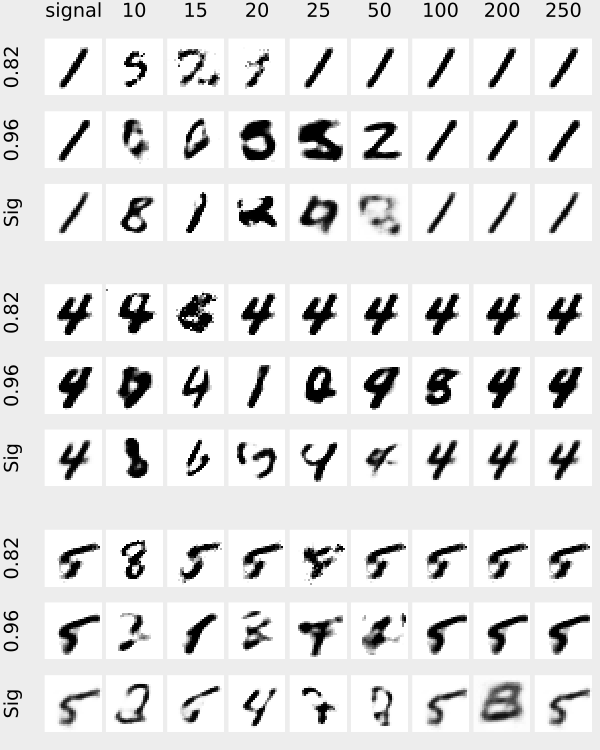

In [416]:
plot_save = plot(plots[1,:]..., plots[2,:]..., plots[3,:]..., size= (600,750), layout = @layout([grid(length(k_arrays), length(meas)) ; grid(length(k_arrays), length(meas)) ; grid(length(k_arrays), length(meas))]), background_color=:grey93)

In [269]:
size(plots)

(3, 27)

In [417]:
savefig(plot_save, "figures/full_number_recovery_plot_v7.pdf")

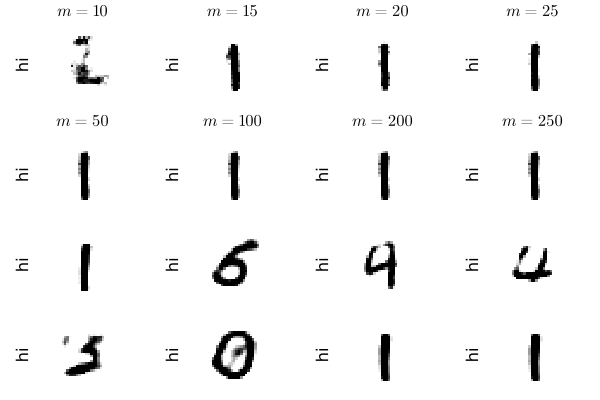

In [70]:
plot1 = plot(plots[1,:]...)
ylabel!("hi")
plot(plot1)

In [5]:
num = 1
z_inco = z_inco_list[num,:]
z_est_inco_list = z_est_inco_matrix[num,:,:]

recon_error = []
for i in 1:length(m_list)
    recon_error = relative_error(G_inco(z_inco), G_inco(z_est_inco_list[:, i]))
end

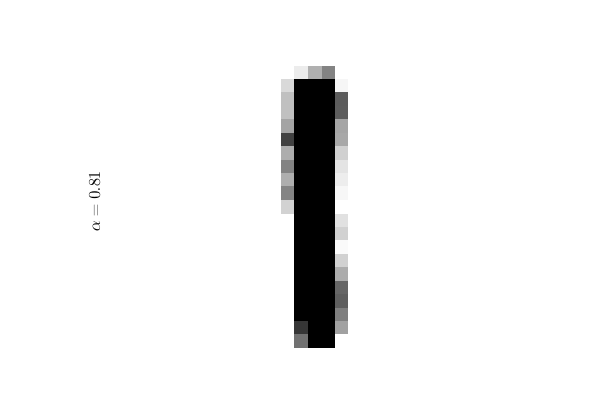

In [6]:
plot(colorview(Gray, reshape(G_inco(z_inco_list[num,:]), 28,28)' ),framestyle = :box,titlefontsiz =8, axis=([], false), ylabel = L"\alpha = 0.81" )

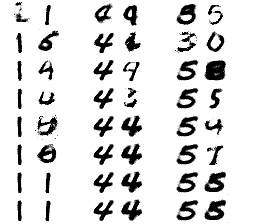

In [20]:
# rec_tensor = []
# for num in 1:9
#     rec_inco_tensor = zeros(28,28,length(m_list))
#     rec_co_tensor = zeros(28,28,length(m_list))
#     for m in 1:length(m_list)
#         rec_inco_tensor[:,:,m] = reshape(G_inco(z_est_inco_matrix[num,:, m]), 28,28)'
#         rec_co_tensor[:,:,m] = reshape(G_inco(z_est_co_matrix[num,:, m]), 28,28)'
#     end
#     cat(rec_inco_tensor, rec_co_tensor; dims = 2 )
#     push!(rec_tensor, )
# end
nums = [1,4,5]
meas = [ 1, 2, 3, 4, 9, 10, 12 ,13]
image = ones(28*length(meas),5)

for num in nums
    rec_inco_tensor = zeros(28,28,length(meas))
    rec_co_tensor = zeros(28,28,length(meas))
    for index in 1:length(meas)
        m = meas[index]
        rec_inco_tensor[:,:,index] = reshape(G_inco(z_est_inco_matrix[num,:, m]), 28,28)
        rec_co_tensor[:,:,index] = reshape(G_inco(z_est_co_matrix[num,:, m]), 28,28)
    end
    # print(size(rec_co_tensor))
    image = hcat(image, reshape(rec_inco_tensor, 28,28*length(meas) )', reshape(rec_co_tensor, 28,28*length(meas) )', ones(28*length(meas),28) )
end




# cat(rec_inco_tensor, rec_co_tensor; dims = 2 )
# push!(rec_tensor, )


colorview(Gray, image)

In [22]:
plot(plot1, plot2, plot3, layout = (3,1))


UndefVarError: UndefVarError: plot2 not defined

In [21]:
num = 1
p1 = plot(colorview(Gray, reshape(G_inco(z_inco[num,:]), 28,28)' )); q1 = plot(colorview(Gray, reshape(G_inco(z_co[num,:]), 28,28)' ));
p2 = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m[1]]), 28,28)' )); q2 = plot(colorview(Gray, reshape(G_inco(z_est_co_matrix[num,:, m[1]]), 28,28)' ));

p3 = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m[2]]), 28,28)' )); q3 = plot(colorview(Gray, reshape(G_inco(z_est_co_matrix[num,:, m[2]]), 28,28)' ));

p4 = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m[3]]), 28,28)' )); q4 = plot(colorview(Gray, reshape(G_inco(z_est_co_matrix[num,:, m[3]]), 28,28)' ));
p5 = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m[4]]), 28,28)' )); q5 = plot(colorview(Gray, reshape(G_inco(z_est_co_matrix[num,:, m[4]]), 28,28)' ));
p6 = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m[5]]), 28,28)' )); q6 = plot(colorview(Gray, reshape(G_inco(z_est_co_matrix[num,:, m[5]]), 28,28)' ));
p3 = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m[2]]), 28,28)' )); q3 = plot(colorview(Gray, reshape(G_inco(z_est_co_matrix[num,:, m[2]]), 28,28)' ));
p3 = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m[2]]), 28,28)' )); q3 = plot(colorview(Gray, reshape(G_inco(z_est_co_matrix[num,:, m[2]]), 28,28)' ));
p3 = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m[2]]), 28,28)' )); q3 = plot(colorview(Gray, reshape(G_inco(z_est_co_matrix[num,:, m[2]]), 28,28)' ));
p3 = plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m[2]]), 28,28)' )); q3 = plot(colorview(Gray, reshape(G_inco(z_est_co_matrix[num,:, m[2]]), 28,28)' ));




q2 = plot(colorview(Gray, reshape(G_inco(z_est_inco_list[:, k]), 28,28)' ))
p3 = plot(colorview(Gray, reshape(G_co(z_co), 28,28)' ))
p4 = plot(colorview(Gray, reshape(G_co(z_est_co_list[:, k]), 28,28)' ))


DimensionMismatch: DimensionMismatch("second dimension of A, 20, does not match length of x, 1")

In [9]:
m_list

13-element Vector{Int64}:
  10
  15
  20
  25
  30
  35
  40
  45
  50
 100
 150
 200
 250